In [20]:
#loading and exloring dataset


import pandas as pd
df = pd.read_csv("C:\\Users\\niyaboby\\Desktop\\sim_student_sleep_data.csv")
print("First five rows\n")
print(df.head())
print("Dataset information\n")
print(df.info())
print("Missing Values Per Column:\n")
print(df.isnull().sum())



First five rows

   Sleep_Hours  Stress_Level  Year    Major Use_Sleep_Tech  \
0          6.9             4     2     Arts            Yes   
1          6.0             6     2  Science             No   
2          7.0             5     1  Science             No   
3          7.6             4     1     Arts            Yes   
4          5.6             5     1  Science            Yes   

   Amount_Coffee_consumed Sleep_Issues   GPA  
0                       1           No  3.97  
1                       1          Yes  3.64  
2                       1          Yes  3.83  
3                       5          Yes  3.88  
4                       4           No  3.46  
Dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep_Hours             100 non-null    float64
 1   Stress_Level            100 non-null    

In [22]:
# Fill missing numeric values with mean of each column

num_cols = ['Sleep_Hours', 'Stress_Level', 'Year', 'Amount_Coffee_consumed', 'GPA']
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
print(df[num_cols].isnull().sum())


Sleep_Hours               0
Stress_Level              0
Year                      0
Amount_Coffee_consumed    0
GPA                       0
dtype: int64


In [50]:
#sorting based on gpa

import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\niyaboby\\Desktop\\sim_student_sleep_data.csv")
df.dropna(axis=0, inplace=True)
sorted_df = df.sort_values(by='GPA')
sorted_df


,Sleep_Hours,Stress_Level,Year,Major,Use_Sleep_Tech,Amount_Coffee_consumed,Sleep_Issues,GPA
13,3.2,10,2,Science,No,5,Yes,2.74
74,3.0,8,3,Science,No,1,No,2.78
95,4.3,8,3,Science,Yes,1,Yes,2.79
15,5.3,6,1,Science,Yes,2,Yes,2.93
56,4.6,10,3,Commerce,No,5,No,2.95
...,...,...,...,...,...,...,...,...
31,8.3,8,3,Science,No,1,No,4.00
22,6.1,9,2,Arts,No,1,Yes,4.00
9,6.7,6,2,Arts,Yes,3,Yes,4.00
70,6.6,5,2,Commerce,No,1,No,4.00


In [48]:
#encoding the data set (use_Sleep_Tech (label encoded),Sleep_Issues (label encoded),major(One-hot),year(one-hot)


from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
df['Use_Sleep_Tech'] = le.fit_transform(df['Use_Sleep_Tech'])
df['Sleep_Issues'] = le.fit_transform(df['Sleep_Issues'])

major = pd.get_dummies(df['Major'], prefix='Major')
year = pd.get_dummies(df['Year'], prefix='Year')

f = pd.concat([df[['Use_Sleep_Tech', 'Sleep_Issues']], major, year], axis=1)
f


,Use_Sleep_Tech,Sleep_Issues,Major_Arts,Major_Commerce,Major_Science,Year_1,Year_2,Year_3
0,1,0,True,False,False,False,True,False
1,0,1,False,False,True,False,True,False
2,0,1,False,False,True,True,False,False
3,1,1,True,False,False,True,False,False
4,1,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
95,1,1,False,False,True,False,False,True
96,1,0,False,True,False,False,False,True
97,1,1,False,False,True,False,True,False
98,1,0,False,True,False,False,False,True


In [49]:
#feature scaling

from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
numeric_cols = ['Sleep_Hours', 'Stress_Level', 'Year', 'Amount_Coffee_consumed', 'GPA']
scaled = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled, columns=[col + '_scaled' for col in numeric_cols])
scaled_df


,Sleep_Hours_scaled,Stress_Level_scaled,Year_scaled,Amount_Coffee_consumed_scaled,GPA_scaled
0,0.962019,-1.333800,0.037823,-1.264402,1.284703
1,0.156608,-0.275229,0.037823,-1.264402,0.184672
2,1.051509,-0.804514,-1.222959,-1.264402,0.818023
3,1.588450,-1.333800,-1.222959,1.383560,0.984695
4,-0.201353,-0.804514,-1.222959,0.721570,-0.415345
...,...,...,...,...,...
95,-1.364725,0.783343,1.298606,-1.264402,-2.648743
96,0.335588,-0.275229,1.298606,1.383560,0.884692
97,0.156608,0.254057,0.037823,1.383560,1.384706
98,-0.022373,0.783343,1.298606,0.721570,0.051335


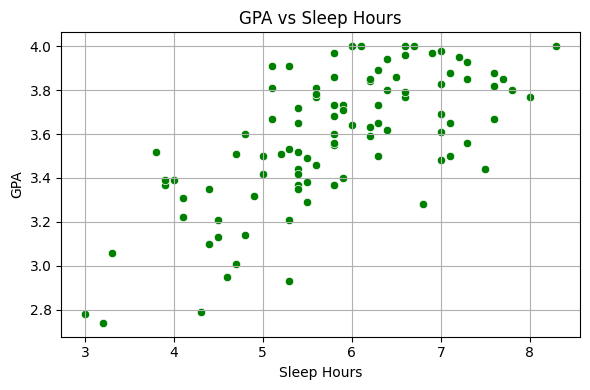

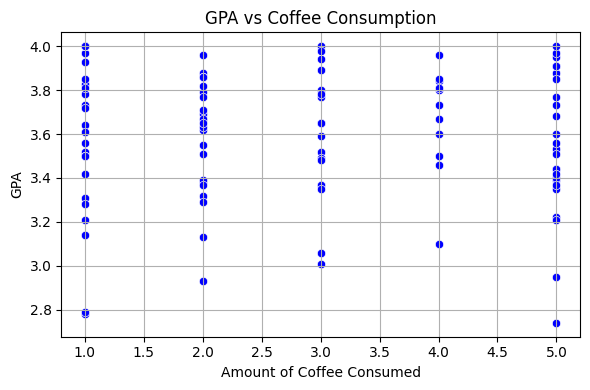

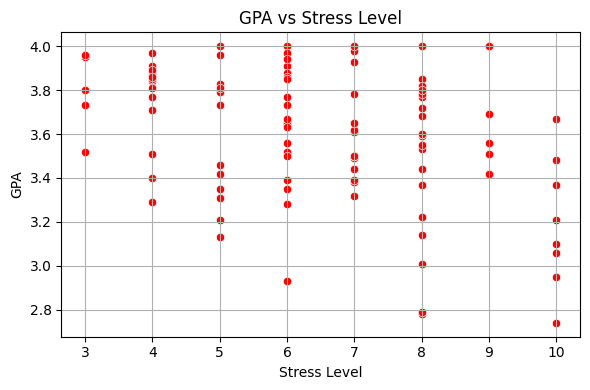

In [36]:
#scatterplot of gpa vs various factors
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Sleep_Hours', y='GPA', data=df, color='green')
plt.title('GPA vs Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('GPA')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Amount_Coffee_consumed', y='GPA', data=df, color='blue')
plt.title('GPA vs Coffee Consumption')
plt.xlabel('Amount of Coffee Consumed')
plt.ylabel('GPA')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Stress_Level', y='GPA', data=df, color='red')
plt.title('GPA vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('GPA')
plt.grid(True)
plt.tight_layout()
plt.show()

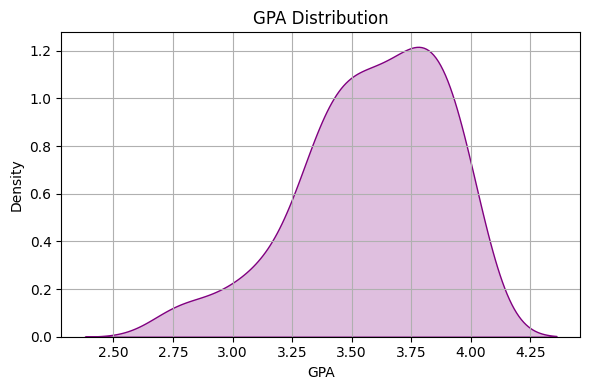

In [43]:
#kde plot of gpa

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.kdeplot(df['GPA'], color='purple', fill=True)
plt.xlabel("GPA")
plt.ylabel("Density")
plt.title("GPA Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()


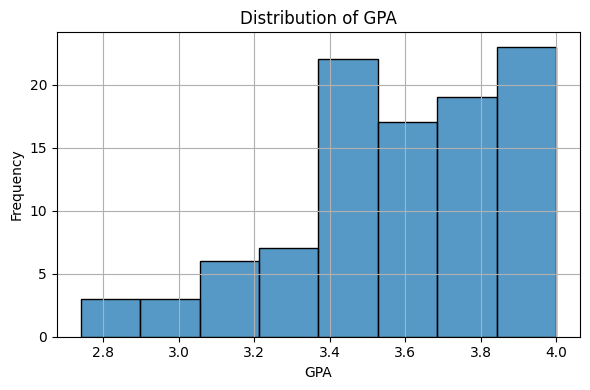

In [44]:
#histogram of gpa distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.histplot(df['GPA'])
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("Distribution of GPA")
plt.grid(True)
plt.tight_layout()
plt.show()


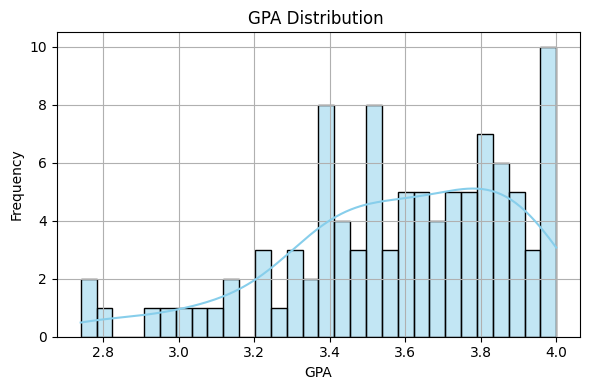

In [46]:
#histogram/Kde plot of gpa
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.histplot(df['GPA'], kde=True, bins=30, color='skyblue')
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.title("GPA Distribution ")
plt.grid(True)
plt.tight_layout()
plt.show()
